In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Data.csv')
df.head()

,Day,Campaign status,Campaign,Budget name,Currency code,Budget,Budget type,Status,Status reasons,Clicks,CTR,Avg. CPC,Impr.,Avg. cost,Cost,Conv. value,Campaign type,Bid strategy type,Campaign group
0,2023-11-18,Paused,New Arrivals 05/10/2023,--,GBP,3.0,Daily,Paused,campaign paused; unknown,1,0.62%,0.16,162,0.16,0.16,0.00,Shopping,Target ROAS,--
1,2023-11-13,Paused,New Arrivals 05/10/2023,--,GBP,3.0,Daily,Paused,campaign paused; unknown,3,1.15%,0.18,261,0.18,0.53,0.00,Shopping,Target ROAS,--
2,2024-01-02,Paused,Display-Campaign Group 01,--,GBP,5.0,Daily,Paused,campaign paused; unknown,0,--,0.00,0,0.00,0.00,0.00,Display,Target ROAS,--
3,2024-01-07,Paused,Display-Campaign Group 01,--,GBP,5.0,Daily,Paused,campaign paused; unknown,0,--,0.00,0,0.00,0.00,0.00,Display,Target ROAS,--
4,2023-10-10,Paused,New Arrivals 05/10/2023,--,GBP,3.0,Daily,Paused,campaign paused; unknown,17,0.72%,0.23,2373,0.23,3.83,118.46,Shopping,Target ROAS,--


In [28]:
newData=df.sort_values(by=['Day'], ascending=True)
newData.head()

,Day,Campaign status,Campaign,Budget name,Currency code,Budget,Budget type,Status,Status reasons,Clicks,CTR,Avg. CPC,Impr.,Avg. cost,Cost,Conv. value,Campaign type,Bid strategy type,Campaign group
26137,2023-05-15,Enabled,Shoptimised_Performance Max-Thars,--,GBP,5.0,Daily,Eligible (Learning),bidding strategy learning; unknown,0,--,0.0,0,0.0,0.0,0.0,Performance Max,Maximize Conversion Value,--
63686,2023-05-15,Enabled,Google css-S_opt-All- P_MAX -5/3/2024~susain,--,GBP,2.0,Daily,Eligible,unknown,0,--,0.0,0,0.0,0.0,0.0,Performance Max,Maximize Conversion Value,Google-CSS- All pro-SEP
19789,2023-05-15,Enabled,P_MAX - FR Merchant,--,GBP,2.0,Daily,Eligible,unknown,0,--,0.0,0,0.0,0.0,0.0,Performance Max,Maximize Conversion Value,--
63503,2023-05-15,Removed,Performance Max-24 Transformer Product hero,--,GBP,8.0,Daily,Removed,campaign removed,0,--,0.0,0,0.0,0.0,0.0,Performance Max,Maximize Conversion Value,--
32070,2023-05-15,Removed,GOOGLE CSS- manuval CPC TO ROAS- Susain 23/02/24,--,GBP,15.0,Daily,Removed,campaign removed; unknown,0,--,0.0,0,0.0,0.0,0.0,Shopping,Target ROAS,--


In [29]:
processingData=newData.drop(['Day','Currency code','Budget type','Budget name','Campaign','Campaign group','Campaign status','Status reasons'], axis='columns', inplace=False)


In [30]:
processingData.duplicated().sum()

84185

In [31]:
processingData=processingData.drop_duplicates()

In [32]:
#as type is a categorical need to transform the categorical features into numerical
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

# Fit the encoder on your training data (e.g., 'my_column')
labelencoder.fit(processingData['Campaign type'])

processingData['encoded_campaign_type'] = labelencoder.transform(processingData['Campaign type'])

In [33]:
le = LabelEncoder()

# Fit the encoder on your training data (e.g., 'my_column')
le.fit(processingData['Bid strategy type'])

processingData['encoded_bid_strategy_type'] =le.transform(processingData['Bid strategy type'])

In [34]:
le = LabelEncoder()

# Fit the encoder on your training data (e.g., 'my_column')
le.fit(processingData['Status'])

processingData['encoded_Status'] =le.transform(processingData['Status'])

In [77]:
cleanedData=processingData.drop(['Campaign type','Bid strategy type','Status'], axis='columns', inplace=False)

In [78]:
data=cleanedData.drop('Conv. value',axis='columns',inplace=False)
target=cleanedData['Conv. value'] # median value
names=cleanedData.columns
print("Shape of the data : ",data.shape)
print("shape of the target : ",target.shape)

Shape of the data :  (5730, 10)
shape of the target :  (5730,)


In [79]:
cleanedData

,Budget,Clicks,CTR,Avg. CPC,Impr.,Avg. cost,Cost,Conv. value,encoded_campaign_type,encoded_bid_strategy_type,encoded_Status
26137,5.0,0,--,0.00,0,0.00,0.00,0.0,2,2,1
63686,2.0,0,--,0.00,0,0.00,0.00,0.0,2,2,0
63503,8.0,0,--,0.00,0,0.00,0.00,0.0,2,2,5
32070,15.0,0,--,0.00,0,0.00,0.00,0.0,4,8,5
31905,20.0,0,--,0.00,0,0.00,0.00,0.0,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...
65863,15.0,6,0.74%,0.58,815,0.58,3.50,0.0,2,2,0
3169,20.0,3,0.17%,0.34,1717,0.34,1.03,0.0,2,2,2
89427,2.0,1,33.33%,0.07,3,0.07,0.07,0.0,2,3,0
34010,20.0,0,0%,0.00,55,0.00,0.00,0.0,2,3,0


In [80]:
cleanedData.isin(['--']).sum()

Budget                         0
Clicks                         0
CTR                          135
Avg. CPC                       0
Impr.                          0
Avg. cost                      0
Cost                           0
Conv. value                    0
encoded_campaign_type          0
encoded_bid_strategy_type      0
encoded_Status                 0
dtype: int64

In [81]:
cleanedData = cleanedData[cleanedData.CTR.isin(['--']) == False]

In [82]:
cleanedData['CTR'] = (pd.to_numeric(cleanedData['CTR'].str[:-1])
                            .div(100)
                            .mask(cleanedData['CTR'] == '%', 0))

C:\Users\Digitweb Sathurjan\AppData\Local\Temp\ipykernel_2360\3378480026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedData['CTR'] = (pd.to_numeric(cleanedData['CTR'].str[:-1])


In [83]:
y=cleanedData['Conv. value']
x=cleanedData.drop('Conv. value',axis='columns',inplace=False)

In [85]:
y.shape

(5595,)

In [86]:
x

,Budget,Clicks,CTR,Avg. CPC,Impr.,Avg. cost,Cost,encoded_campaign_type,encoded_bid_strategy_type,encoded_Status
23165,5.0,4,0.0129,0.26,310,0.26,1.03,4,8,4
55926,2.0,3,0.0026,0.14,1146,0.14,0.42,4,8,4
19455,2.0,12,0.0041,0.22,2904,0.22,2.69,4,8,4
31868,5.0,1,0.0028,0.30,361,0.30,0.30,4,8,4
28665,5.0,0,0.0000,0.00,29,0.00,0.00,4,8,4
...,...,...,...,...,...,...,...,...,...,...
65863,15.0,6,0.0074,0.58,815,0.58,3.50,2,2,0
3169,20.0,3,0.0017,0.34,1717,0.34,1.03,2,2,2
89427,2.0,1,0.3333,0.07,3,0.07,0.07,2,3,0
34010,20.0,0,0.0000,0.00,55,0.00,0.00,2,3,0


In [19]:
x['y']=y

In [87]:
COF=x.corr(method='pearson')
COF.head()

,Budget,Clicks,CTR,Avg. CPC,Impr.,Avg. cost,Cost,encoded_campaign_type,encoded_bid_strategy_type,encoded_Status
Budget,1.000000,0.602811,-0.024079,0.018469,0.587076,0.026992,0.624079,-0.278273,-0.151672,-0.254675
Clicks,0.602811,1.000000,-0.060448,-0.008300,0.981759,0.007261,0.957075,-0.132918,-0.039628,-0.122749
CTR,-0.024079,-0.060448,1.000000,0.058089,-0.087307,0.067023,-0.059227,-0.092748,-0.056266,-0.090521
Avg. CPC,0.018469,-0.008300,0.058089,1.000000,-0.009171,0.957073,0.115496,-0.236894,-0.113739,-0.201458
Impr.,0.587076,0.981759,-0.087307,-0.009171,1.000000,0.003709,0.944232,-0.119886,-0.033956,-0.107864


<Axes: >

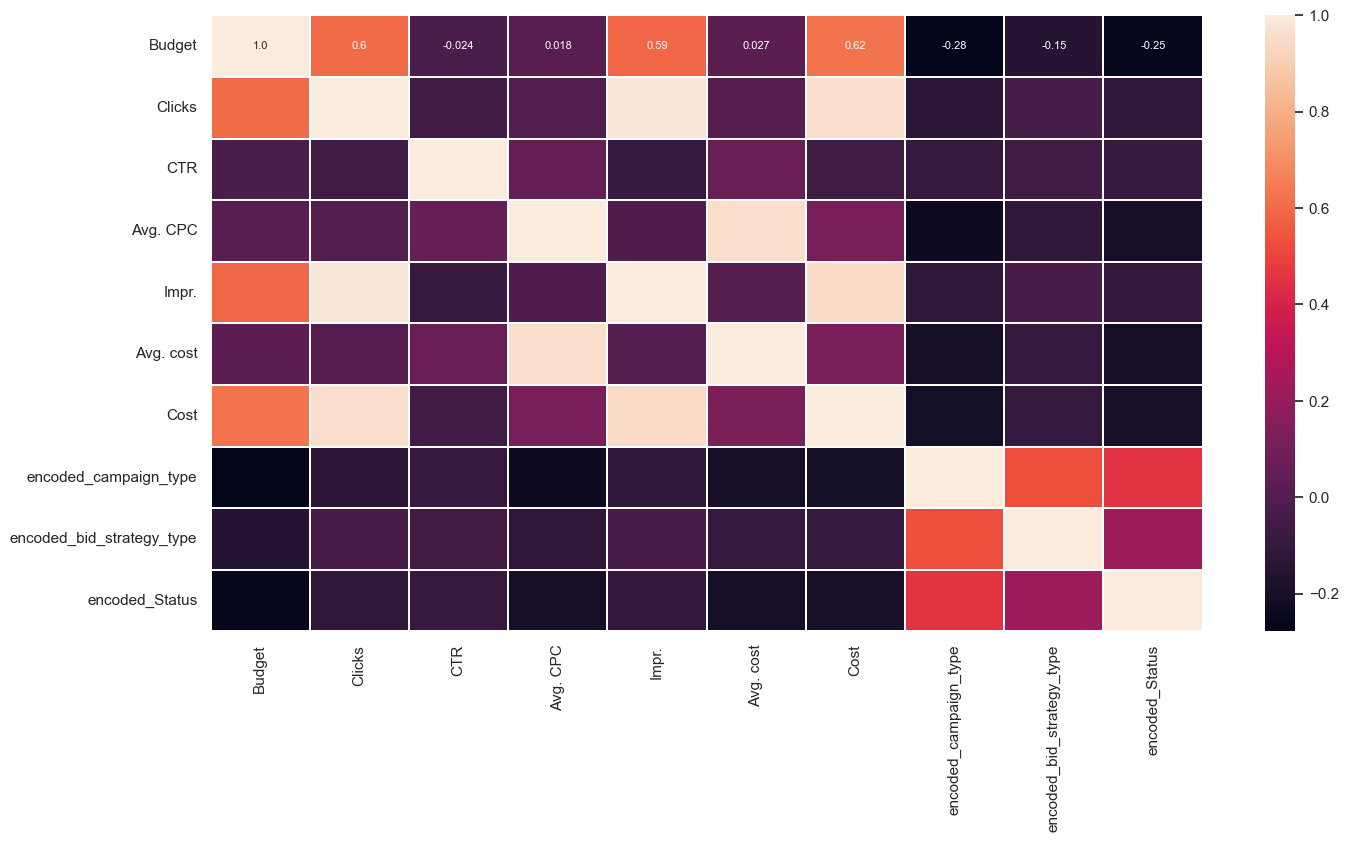

In [88]:
import seaborn as sns
sns.set(rc={'figure.figsize':(16,8)})
sns.heatmap(COF, annot=True,linewidth=0.1,annot_kws={"size":8},fmt='.2')

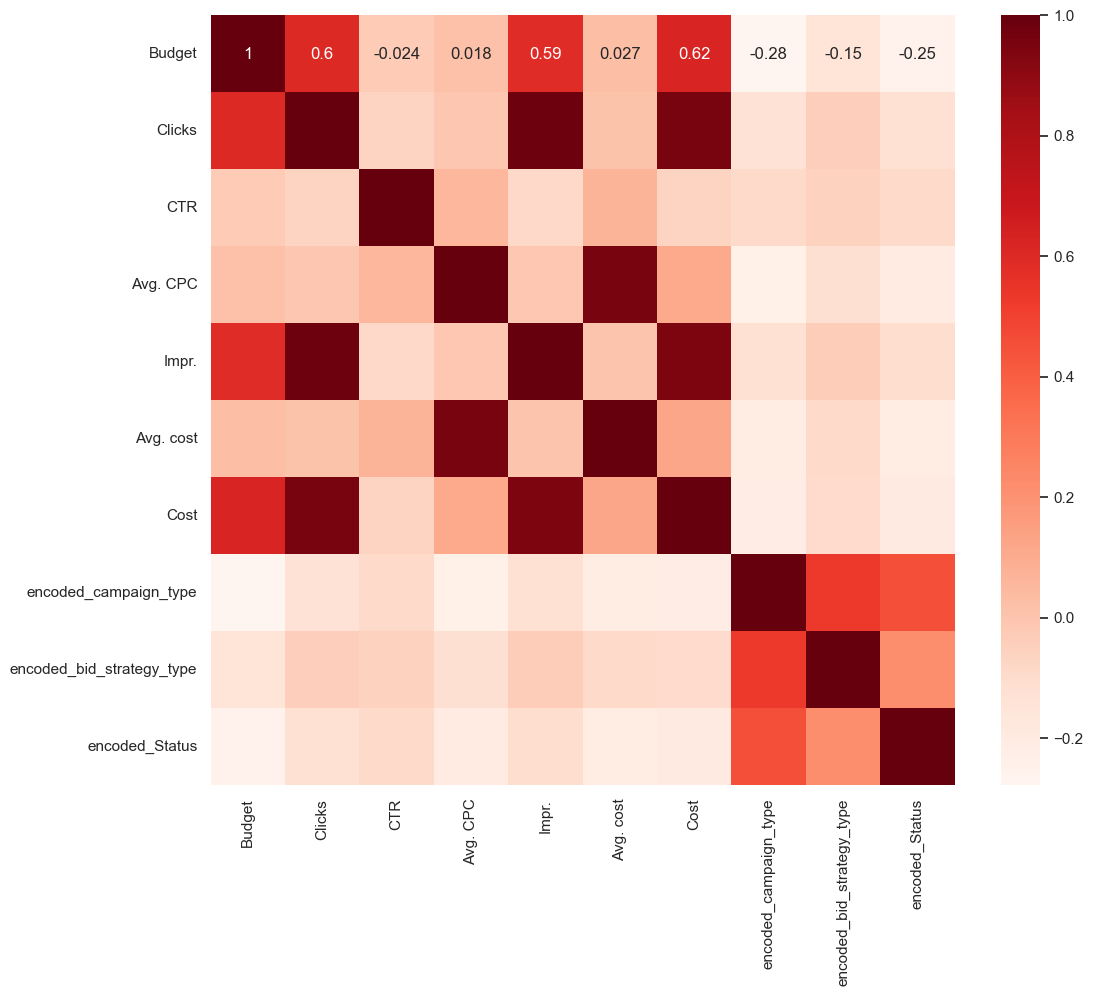

In [89]:
#using pearson correlation
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
cor=x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [90]:
#Correlation with output variable
cor_target=abs(cor["Cost"])

In [91]:
corr_matrix=x.corr()
corr_matrix["Cost"].sort_values(ascending=False)

Cost                         1.000000
Clicks                       0.957075
Impr.                        0.944232
Budget                       0.624079
Avg. cost                    0.125718
Avg. CPC                     0.115496
CTR                         -0.059227
encoded_bid_strategy_type   -0.097184
encoded_Status              -0.196269
encoded_campaign_type       -0.210922
Name: Cost, dtype: float64

In [92]:
#selecting highly correlated features
relevent_features=cor_target[cor_target>0.25]   #threshold value=0.5
relevent_features

Budget    0.624079
Clicks    0.957075
Impr.     0.944232
Cost      1.000000
Name: Cost, dtype: float64

In [93]:
print(x[["Clicks","Impr."]].corr())
print("\n",x[["Clicks","encoded_Status"]].corr())
print("\n",x[["Impr.","Cost"]].corr())
print("\n",x[["Budget","Cost"]].corr())
print("\n",x[["Budget","Clicks"]].corr())
print("\n",x[["Budget","Impr."]].corr())
print("\n",x[["Impr.","encoded_bid_strategy_type"]].corr())


          Clicks     Impr.
Clicks  1.000000  0.981759
Impr.   0.981759  1.000000

                   Clicks  encoded_Status
Clicks          1.000000       -0.122749
encoded_Status -0.122749        1.000000

           Impr.      Cost
Impr.  1.000000  0.944232
Cost   0.944232  1.000000

           Budget      Cost
Budget  1.000000  0.624079
Cost    0.624079  1.000000

           Budget    Clicks
Budget  1.000000  0.602811
Clicks  0.602811  1.000000

           Budget     Impr.
Budget  1.000000  0.587076
Impr.   0.587076  1.000000

                               Impr.  encoded_bid_strategy_type
Impr.                      1.000000                  -0.033956
encoded_bid_strategy_type -0.033956                   1.000000


In [62]:
X=x

In [63]:
y=y.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [64]:
X

array([[5.000e+00, 4.000e+00, 1.290e-02, ..., 4.000e+00, 8.000e+00,
        4.000e+00],
       [2.000e+00, 3.000e+00, 2.600e-03, ..., 4.000e+00, 8.000e+00,
        4.000e+00],
       [2.000e+00, 1.200e+01, 4.100e-03, ..., 4.000e+00, 8.000e+00,
        4.000e+00],
       ...,
       [2.000e+00, 1.000e+00, 3.333e-01, ..., 2.000e+00, 3.000e+00,
        0.000e+00],
       [2.000e+01, 0.000e+00, 0.000e+00, ..., 2.000e+00, 3.000e+00,
        0.000e+00],
       [6.000e+00, 0.000e+00, 0.000e+00, ..., 2.000e+00, 2.000e+00,
        2.000e+00]])

In [65]:
y

array([0., 0., 0., ..., 0., 0., 0.])

In [94]:
import pandas as pd
from sklearn.linear_model import LassoCV,Lasso
reg=LassoCV()
reg.fit(x,y)
print("Best Alpha using built-in LassoCV : %f"%reg.alpha_)
print("Best Score using built-in LassoCV : %f"%reg.score(x,y))
coef=pd.Series(reg.coef_,index=x.columns)

Best Alpha using built-in LassoCV : 367.744272
Best Score using built-in LassoCV : 0.353057


In [95]:
print("Lasso picked "+ str(sum(coef!=0))+" variables and eliminated the other "+str(sum(coef==0))+" variables")

Lasso picked 1 variables and eliminated the other 9 variables


Text(0.5, 1.0, 'Feature Importance using Lasso Model')

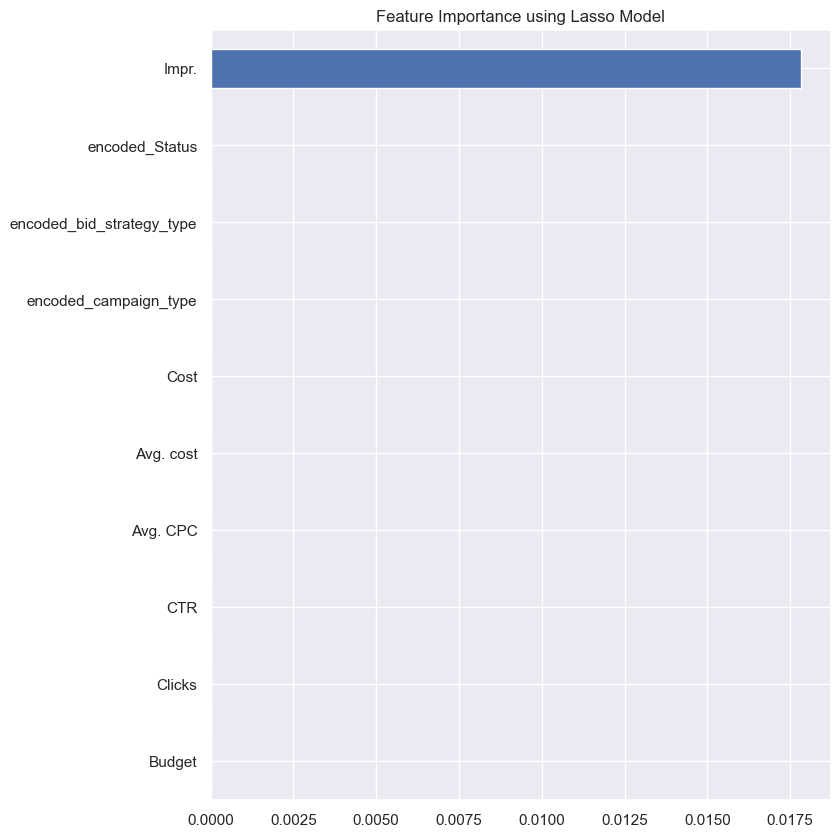

In [96]:
import matplotlib as mpl
imp_coef=coef.sort_values()
mpl.rcParams['figure.figsize']=(8.0, 10.0)
imp_coef.plot(kind="barh")
plt.title("Feature Importance using Lasso Model")

# 

## some other feature selection methods

### Backward Elimination  using Ordinary Least Squares

In [97]:
import statsmodels.api as sm
#adding constant columsn of ones, mandotory for sm.OLS model
x_1=sm.add_constant(x)

#fitting sm.OLS model
model=sm.OLS(y,x_1).fit()
model.pvalues

const                        2.952588e-01
Budget                       3.106877e-09
Clicks                       1.817771e-20
CTR                          2.961005e-01
Avg. CPC                     3.852396e-04
Impr.                        8.883666e-01
Avg. cost                    1.751635e-03
Cost                         1.946960e-01
encoded_campaign_type        9.604499e-01
encoded_bid_strategy_type    6.852484e-07
encoded_Status               1.571560e-01
dtype: float64

In [98]:
#backward elimination
cols=list(x.columns)
pmax=1
while(len(cols)>0):
    p=[]
    x_1=x[cols]
    x_1=sm.add_constant(x_1)
    model=sm.OLS(y,x_1).fit()
    p=pd.Series(model.pvalues.values[1:],index=cols)
    pmax=max(p)
    feature_with_p_max=p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE=cols
print(selected_features_BE)

['Budget', 'Clicks', 'Avg. CPC', 'Avg. cost', 'encoded_bid_strategy_type']


### Recursive Feature Elimination

In [99]:
from sklearn.linear_model import LinearRegression, RidgeCV,Ridge
from sklearn.feature_selection import RFE

model=LinearRegression()

#initializing RFE model
rfe=RFE(model)

#transforming data using RFE
x_rfe=rfe.fit_transform(x,y)

#fitting the data to model
model.fit(x_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True False  True False False  True False]
[2 1 1 1 6 1 4 5 1 3]


In [100]:
from sklearn.model_selection import train_test_split
#no of features
nof_list=np.arange(1,13)
high_score=0

#variable to store the optimum features
nof=0
score_list=[]
for n in range(len(nof_list)):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
model=LinearRegression()
rfe=RFE(model)
x_train_rfe=rfe.fit_transform(x_train,y_train)
x_test_rfe=rfe.transform(x_test)
model.fit(x_train_rfe,y_train)
score=model.score(x_test_rfe,y_test)
score_list.append(score)
if(score>high_score):
    high_score=score
    nof=nof_list[n];
print("Optimum number of features : %d"%nof)
print("Score with %d features: %f"%(nof,high_score));

Optimum number of features : 12
Score with 12 features: 0.302485


In [101]:
cols=list(x.columns)
model=LinearRegression()

#initializing RFE model
rfe=RFE(model)

#Transforming data using RFE
x_rfe=rfe.fit_transform(x,y)

#fitting the data to model
model.fit(x_rfe,y)
temp=pd.Series(rfe.support_,index=cols)
selected_features_rfe=temp[temp==True].index
print(selected_features_rfe)

Index(['Clicks', 'CTR', 'Avg. CPC', 'Avg. cost', 'encoded_bid_strategy_type'], dtype='object')
